[View in Colaboratory](https://colab.research.google.com/github/TarunSunkaraneni/TensorFlow/blob/master/Images/fashion_mnist.ipynb)

In [12]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print(tf.__version__)
sns.set()

1.11.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 5s 1us/step


In [9]:
# how many labels we have
print(len(np.bincount(train_labels)))
class_names = ['T-shirt/top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

10


In [5]:
print('training image shapes: {}'.format(train_images.shape))
print('training image labels: {}'.format(len(train_labels)))
print('testing image shapes: {}'.format(test_images.shape))
print('testing image labels: {}'.format(len(test_labels)))

training image shapes: (60000, 28, 28)
training image labels: 60000
testing image shapes: (10000, 28, 28)
testing image labels: 10000


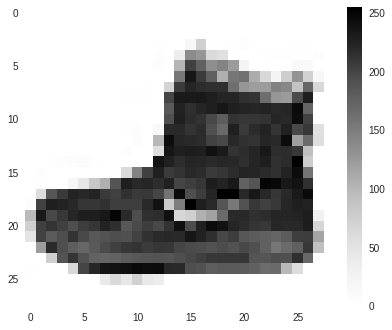

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [0]:
# Normalize te pixel values of images
train_images = train_images / 255.0

test_images = test_images / 255.0

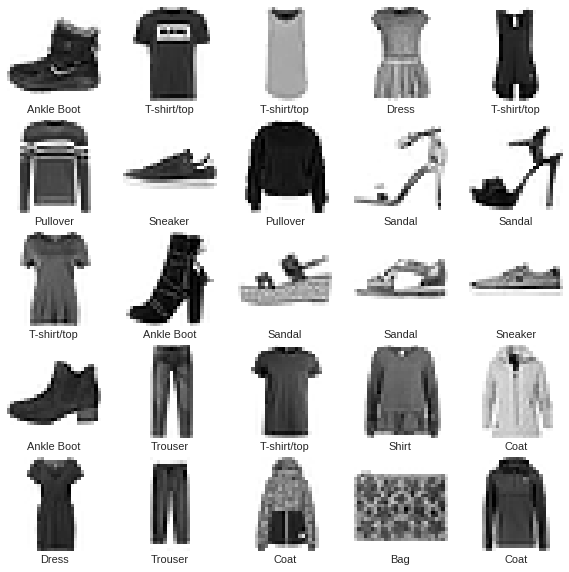

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [0]:
model = Sequential([
    Flatten(input_shape=(28,28)), # flattens to 28 * 28 pixel images; has nothing to learn
    Dense(128, activation=tf.nn.relu), # Dense layer
    Dense(10,activation=tf.nn.softmax) # returns an arry of 10 probability scores that sum to 1
])

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.4938 - acc: 0.8263
Epoch 2/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.3732 - acc: 0.8669
Epoch 3/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.3338 - acc: 0.8791
Epoch 4/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.3123 - acc: 0.8863
Epoch 5/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.2946 - acc: 0.8920
Epoch 6/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.2826 - acc: 0.8940
Epoch 7/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.2677 - acc: 0.9020
Epoch 8/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.2573 - acc: 0.9042
Epoch 9/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.2473 - acc: 0.9074
Epoch 10/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.2401 - acc: 0.9107

In [16]:
predictions=model.predict(test_images)
predictions[0] # confidences of all classes for the first example

array([1.50338877e-07, 1.99742219e-11, 2.20402518e-09, 2.41353798e-10,
       2.37542937e-11, 8.01499293e-04, 3.48624027e-08, 6.61803177e-03,
       1.19116885e-08, 9.92580354e-01], dtype=float32)

In [17]:
np.argmax(predictions[0])

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

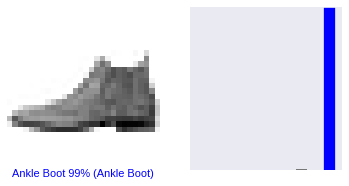

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

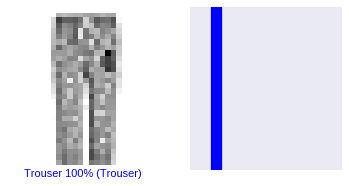

In [20]:
i = round(len(test_labels) * np.random.random())
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

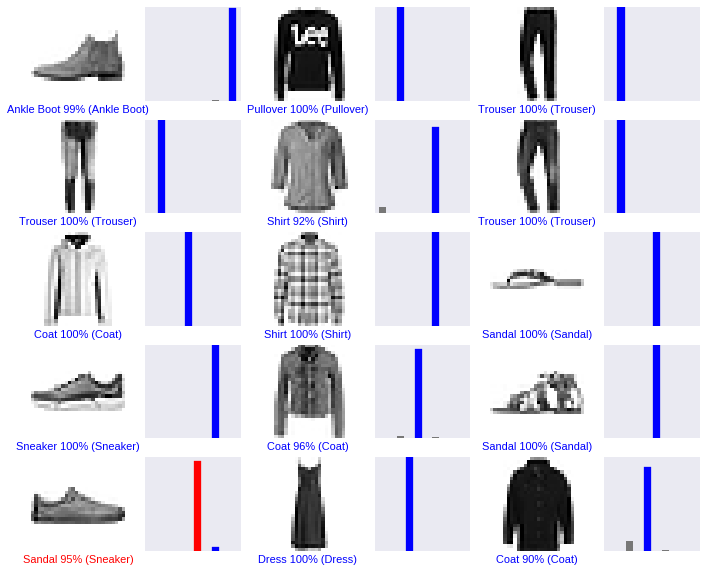

In [21]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [22]:
# Grab an image from the test dataset
img = test_images[0]
print(img.shape)

(28, 28)


In [23]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [24]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.5033930e-07 1.9974222e-11 2.2040252e-09 2.4135380e-10 2.3754205e-11
  8.0149889e-04 3.4862534e-08 6.6180285e-03 1.1911711e-08 9.9258035e-01]]


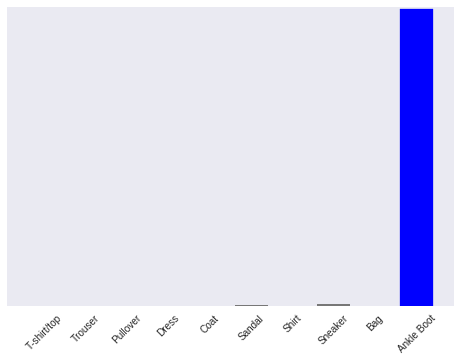

In [25]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [27]:
print(np.argmax(predictions_single[0]), class_names[np.argmax(predictions_single[0])])

9 Ankle Boot
